# 多項式フィッティングと過学習

true w: [-0.2, 0.4, -0.1, 0.1]
estimated w: [-0.17837461  0.52990641 -2.09025854 -2.03766195]


(-250, 250)

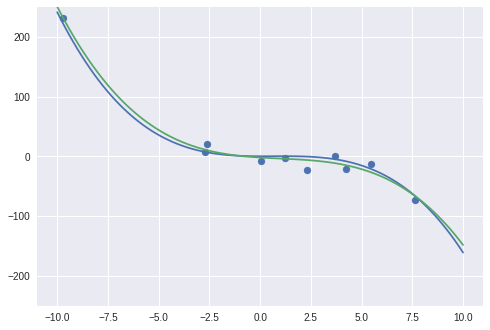

In [7]:
import numpy as np

order=3
np.random.seed(1234)
# データ数と真のパラメータを指定して、真の関数を構築する
N=10
w_true=[-0.2,0.4,-0.1,0.1]
def f(x,w):
  return np.poly1d(w)(x) 
x=np.linspace(-10,10,100)
y=f(x,w_true)

# 真の関数にノイズを加えてデータを作成する
# 
noise=np.random.normal(0,10,N)
data_x=(np.random.rand(N)-0.5)*20
data_y=f(data_x,w_true)+noise

w_est=np.polyfit(data_x,data_y,order)
print("true w:",w_true)
print("estimated w:",w_est)
pred_y=np.poly1d(w_est)(x)

# 描画する
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(data_x,data_y)
plt.plot(x,pred_y)
plt.ylim(-250,250)


# 汎化誤差と交差検定


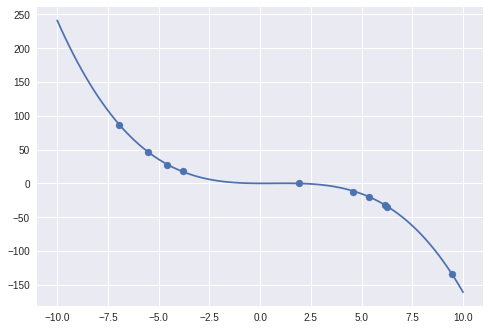

In [0]:
import numpy as np

# データ数と真のパラメータを指定して、真の関数を構築する
N=10
w_true=[-0.2,0.4,-0.1,0.1]
def f(x,w):
  return np.poly1d(w)(x) 

x=np.linspace(-10,10,100)
y=f(x,w_true)


# 真の関数にノイズを加えてデータを作成する
# 
noise=np.random.normal(0,1,N)
#1. 一様にデータをサンプリングする。真のデータの分布は一様とする
data_x=(np.random.rand(N)-0.5)*20
#2. データのサンプリング方法は正規分布（中心からより多くのデータをとる）。真のデータの分布とは異なる分布でサンプリングする。
#data_x=np.random.normal(0,3,N)
data_y=f(data_x,w_true)+noise


# 描画する
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(data_x,data_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


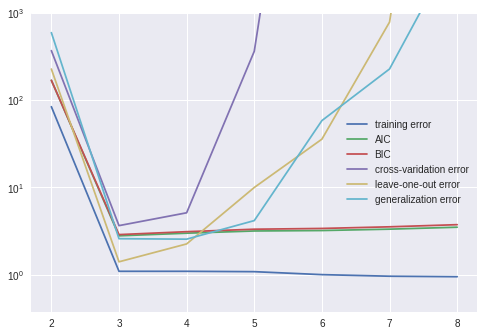

In [0]:
from sklearn.model_selection import KFold,LeaveOneOut

# 汎化誤差計算用の外部データを生成する
TestN=1000
noise=np.random.normal(0,1,TestN)
test_x=(np.random.rand(TestN)-0.5)*20
test_y=f(test_x,w_true)+noise

# 各種誤差・情報量基準を定義する
def error(pred_y,y):
  nll=np.log(2*np.pi)/2.0 +((pred_y-y)**2)/2.0
  return np.mean(nll)

def aic(pred_y,y,i):
  n=pred_y.shape[0]
  aic=(np.sum(np.log(2*np.pi)/2.0 +((pred_y-y)**2)/2.0)+i)*2
  return aic/n

def bic(pred_y,y,i):
  n=pred_y.shape[0]
  bic=(np.sum(np.log(2*np.pi)/2.0 +((pred_y-y)**2)/2.0))*2+i*np.log(n)
  return bic/n

def compute_cv_error(data_x,data_y,n_splits=3):
  cv_error=[]
  kf=KFold(n_splits=n_splits)
  for train_index, test_index in kf.split(data_x):
    cv_x_train, cv_x_test = data_x[train_index], data_x[test_index]
    cv_y_train, cv_y_test = data_y[train_index], data_y[test_index]
    w_cv = np.polyfit(cv_x_train,cv_y_train,i)
    cv_e=error(f(cv_x_test,w_cv),cv_y_test)
    cv_error.append(cv_e)
  return cv_error

def compute_loo_error(data_x,data_y):
  loo_error=[]
  loo=LeaveOneOut()
  for train_index, test_index in loo.split(data_x):
    cv_x_train, cv_x_test = data_x[train_index], data_x[test_index]
    cv_y_train, cv_y_test = data_y[train_index], data_y[test_index]
    w_cv = np.polyfit(cv_x_train,cv_y_train,i)
    loo_e=error(f(cv_x_test,w_cv),cv_y_test)
    loo_error.append(loo_e)
  return loo_error

# 推定する関数の次数を変えながら各種誤差を計算する
TE_list=[]
GE_list=[]
CV_list=[]
LOO_list=[]
AIC_list=[]
BIC_list=[]
for i in range(2,9):
  w_est = np.polyfit(data_x,data_y,i)
  TE_list.append(error(f(data_x,w_est),data_y))
  AIC_list.append(aic(f(data_x,w_est),data_y,i))
  BIC_list.append(bic(f(data_x,w_est),data_y,i))
  GE_list.append(error(f(test_x,w_est),test_y))
  CV_list.append(np.mean(compute_cv_error(data_x,data_y,3)))
  LOO_list.append(np.mean(compute_loo_error(data_x,data_y)))

# 横軸を次数にして、各種誤差をプロット
i_list=list(range(2,9))
plt.plot(i_list,TE_list,label="training error")
plt.plot(i_list,AIC_list,label="AIC")
plt.plot(i_list,BIC_list,label="BIC")
plt.plot(i_list,CV_list,label="cross-varidation error")
plt.plot(i_list,LOO_list,label="leave-one-out error")
plt.plot(i_list,GE_list,label="generalization error")
plt.yscale("log")
plt.ylim(0,1000)
plt.legend()


# 真のモデルがフィッティングするモデルに含まれない時

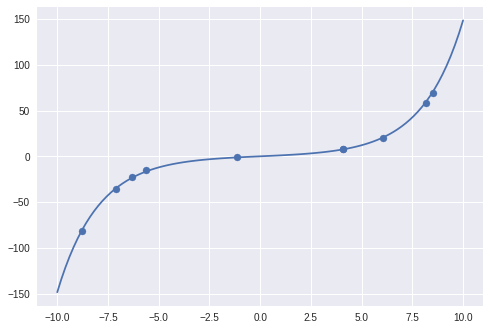

In [8]:
import numpy as np

# データ数と真のパラメータを指定して、真の関数を構築する
N=10
def g(x):
  return np.exp(x*0.5)-np.exp(-x*0.5) 
x=np.linspace(-10,10,100)
y=g(x)


# 真の関数にノイズを加えてデータを作成する
# 
noise=np.random.normal(0,1,N)
#1. 一様にデータをサンプリングする。真のデータの分布は一様とする
data_x=(np.random.rand(N)-0.5)*20
#2. データのサンプリング方法は正規分布（中心からより多くのデータをとる）。真のデータの分布とは異なる分布でサンプリングする。
#data_x=np.random.normal(0,3,N)
data_y=g(data_x)+noise


# 描画する
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(data_x,data_y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


BIC: [274.7606699597378, 8.100608388477447, 6.458635158307897, 3.238143946613698, 3.3523900021806456, 3.4908546831527714, 3.6864761292610284]
AIC: [274.700152941139, 8.009832860579234, 6.337601121110278, 3.0868514001166747, 3.170838946384218, 3.2790451180569398, 3.4444080548657916]


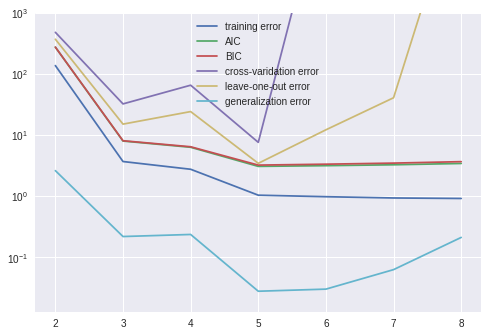

In [10]:
from sklearn.model_selection import KFold,LeaveOneOut

# 汎化誤差計算用の外部データを生成する
TestN=1000
noise=np.random.normal(0,1,TestN)
test_x=(np.random.rand(TestN)-0.5)*20
test_y=g(test_x)+noise

# 各種誤差・情報量基準を定義する
def error(pred_y,y):
  nll=np.log(2*np.pi)/2.0 +((pred_y-y)**2)/2.0
  return np.mean(nll)

def aic(pred_y,y,i):
  n=pred_y.shape[0]
  aic=(np.sum(np.log(2*np.pi)/2.0 +((pred_y-y)**2)/2.0)+i)*2
  return aic/n

def bic(pred_y,y,i):
  n=pred_y.shape[0]
  bic=(np.sum(np.log(2*np.pi)/2.0 +((pred_y-y)**2)/2.0))*2+i*np.log(n)
  return bic/n

def compute_cv_error(data_x,data_y,n_splits=3):
  cv_error=[]
  kf=KFold(n_splits=n_splits)
  for train_index, test_index in kf.split(data_x):
    cv_x_train, cv_x_test = data_x[train_index], data_x[test_index]
    cv_y_train, cv_y_test = data_y[train_index], data_y[test_index]
    w_cv = np.polyfit(cv_x_train,cv_y_train,i)
    cv_e=error(f(cv_x_test,w_cv),cv_y_test)
    cv_error.append(cv_e)
  return cv_error

def compute_loo_error(data_x,data_y):
  loo_error=[]
  loo=LeaveOneOut()
  for train_index, test_index in loo.split(data_x):
    cv_x_train, cv_x_test = data_x[train_index], data_x[test_index]
    cv_y_train, cv_y_test = data_y[train_index], data_y[test_index]
    w_cv = np.polyfit(cv_x_train,cv_y_train,i)
    loo_e=error(f(cv_x_test,w_cv),cv_y_test)
    loo_error.append(loo_e)
  return loo_error

# 推定する関数の次数を変えながら各種誤差を計算する
TE_list=[]
GE_list=[]
CV_list=[]
LOO_list=[]
AIC_list=[]
BIC_list=[]
for i in range(2,9):
  w_est = np.polyfit(data_x,data_y,i)
  TE_list.append(error(f(data_x,w_est),data_y))
  AIC_list.append(aic(f(data_x,w_est),data_y,i))
  BIC_list.append(bic(f(data_x,w_est),data_y,i))
  GE_list.append(error(f(test_x,w_est),test_y)/100)
  CV_list.append(np.mean(compute_cv_error(data_x,data_y,3)))
  LOO_list.append(np.mean(compute_loo_error(data_x,data_y)))

# 横軸を次数にして、各種誤差をプロット
i_list=list(range(2,9))
plt.plot(i_list,TE_list,label="training error")
plt.plot(i_list,AIC_list,label="AIC")
plt.plot(i_list,BIC_list,label="BIC")
plt.plot(i_list,CV_list,label="cross-varidation error")
plt.plot(i_list,LOO_list,label="leave-one-out error")
plt.plot(i_list,GE_list,label="generalization error")
plt.yscale("log")
plt.ylim(0,1000)
plt.legend()
print("BIC:",BIC_list)
print("AIC:",AIC_list)